# Project Oh-Dance : Membuat Model NLP dengan TensorFlow

## Importing Required Libraries

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import nltk
from nltk.corpus import stopwords
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

Initialization Stopwords

In [4]:
nltk.download('stopwords')
stopwords_id = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mocha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Loading the data and getting basic idea

In [5]:
df_dataset = pd.read_csv('DatasetV0.1.csv')
# Check count of nulls in every column
# Reference: https://stackoverflow.com/a/57141046
df_dataset.isna().sum()

label      0
Kalimat    0
dtype: int64

In [6]:
# Remove row with null value
# Reference: https://stackoverflow.com/a/44548976
df_dataset = df_dataset.dropna(how='any',axis=0) 

In [7]:
df_dataset.isna().sum()

label      0
Kalimat    0
dtype: int64

In [8]:
df_dataset.info()
df_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    496 non-null    object
 1   Kalimat  496 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


,label,Kalimat
0,Tari Pakarena,Tari Pakarena merupakan salah satu kesenian tr...
1,Tari Pakarena,Properti utama yang digunakan oleh para penari...
2,Tari Pakarena,Tari Pakarena merupakan salah satu ikon kebuda...
3,Tari Pakarena,"Dalam pementasannya, tari pakarena dimainkan o..."
4,Tari Pakarena,"Pada masa lalu, Tari Pakarena dipertunjukkan s..."


## Class distribution

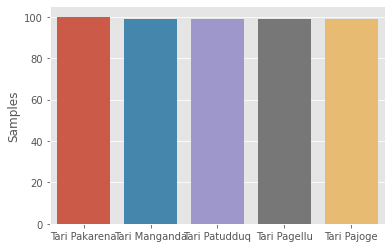

In [31]:
x = df_dataset.label.value_counts()
sns.barplot(x=x.index, y=x)
plt.gca().set_ylabel('Samples')
plt.show()

## Exploratory Data Analysis of Oh Dance Datasets

First, we will do very basic analysis, that is character level, word level and sentence level analysis.

### Number of characters in sentences

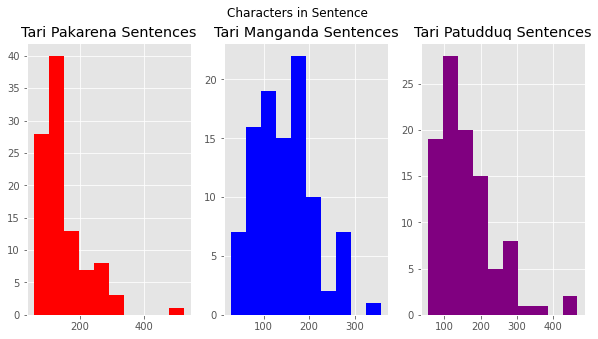

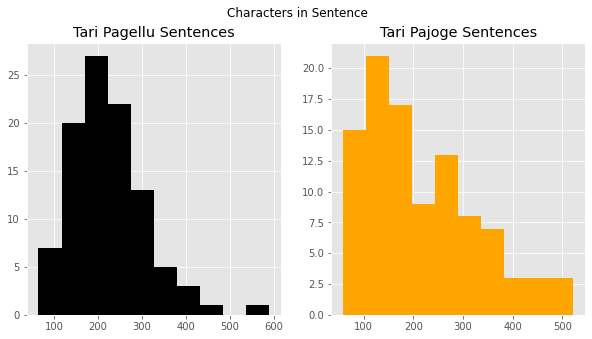

In [19]:
fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
count_pakarena = df_dataset[df_dataset['label']=='Tari Pakarena']['Kalimat'].str.len()
ax1.hist(count_pakarena, color='red')
ax1.set_title('Tari Pakarena Sentences')

count_manganda = df_dataset[df_dataset['label']=='Tari Manganda']['Kalimat'].str.len()
ax2.hist(count_manganda, color='blue')
ax2.set_title('Tari Manganda Sentences')

count_patudduq = df_dataset[df_dataset['label']=='Tari Patudduq']['Kalimat'].str.len()
ax3.hist(count_patudduq, color='purple')
ax3.set_title('Tari Patudduq Sentences')
fig1.suptitle('Characters in Sentence')

fig2, (ax4, ax5) = plt.subplots(1, 2, figsize=(10, 5))
count_pagellu = df_dataset[df_dataset['label']=='Tari Pagellu']['Kalimat'].str.len()
ax4.hist(count_pagellu, color='black')
ax4.set_title('Tari Pagellu Sentences')

count_pajoge = df_dataset[df_dataset['label']=='Tari Pajoge']['Kalimat'].str.len()
ax5.hist(count_pajoge, color='orange')
ax5.set_title('Tari Pajoge Sentences')
fig2.suptitle('Characters in Sentence')

plt.show()



The distribution of both seems to be almost same. 100 to 200 characters in a tweet are the most common.

### Number of words in sentence

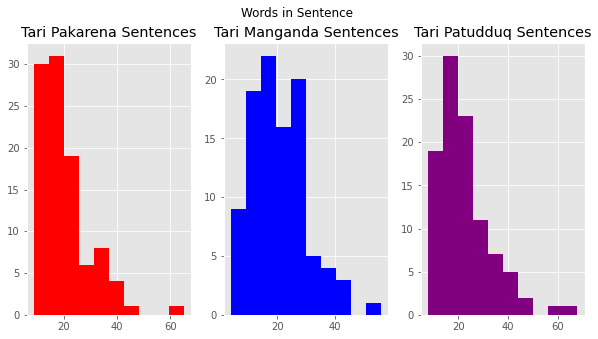

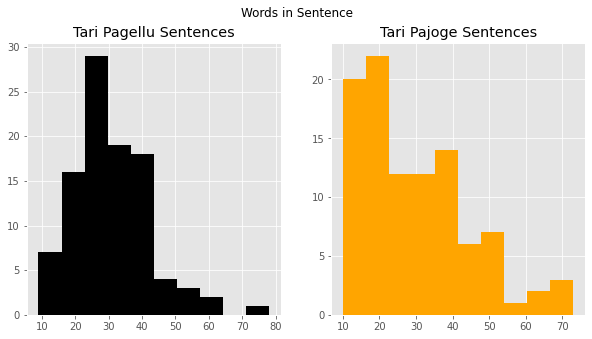

In [20]:
fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
count_pakarena = df_dataset[df_dataset['label']=='Tari Pakarena']['Kalimat'].str.split().map(lambda x: len(x))
ax1.hist(count_pakarena, color='red')
ax1.set_title('Tari Pakarena Sentences')

count_manganda = df_dataset[df_dataset['label']=='Tari Manganda']['Kalimat'].str.split().map(lambda x: len(x))
ax2.hist(count_manganda, color='blue')
ax2.set_title('Tari Manganda Sentences')

count_patudduq = df_dataset[df_dataset['label']=='Tari Patudduq']['Kalimat'].str.split().map(lambda x: len(x))
ax3.hist(count_patudduq, color='purple')
ax3.set_title('Tari Patudduq Sentences')
fig1.suptitle('Words in Sentence')

fig2, (ax4, ax5) = plt.subplots(1, 2, figsize=(10, 5))
count_pagellu = df_dataset[df_dataset['label']=='Tari Pagellu']['Kalimat'].str.split().map(lambda x: len(x))
ax4.hist(count_pagellu, color='black')
ax4.set_title('Tari Pagellu Sentences')

count_pajoge = df_dataset[df_dataset['label']=='Tari Pajoge']['Kalimat'].str.split().map(lambda x: len(x))
ax5.hist(count_pajoge, color='orange')
ax5.set_title('Tari Pajoge Sentences')
fig2.suptitle('Words in Sentence')

plt.show()

### Average word length in a sentence

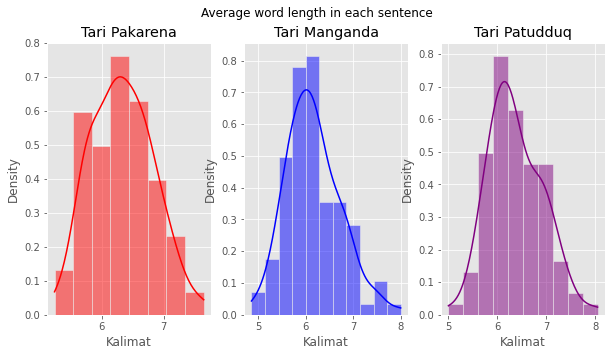

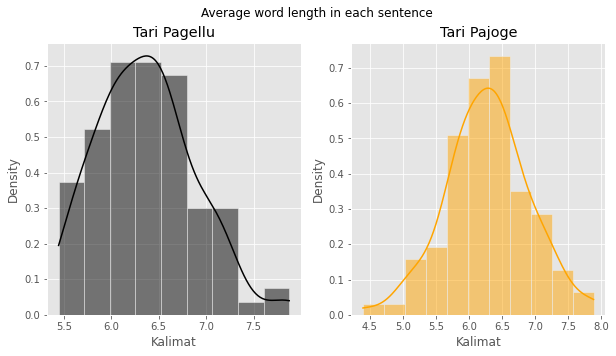

In [29]:
fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
count_pakarena = df_dataset[df_dataset['label']=='Tari Pakarena']['Kalimat'].str.split().apply(lambda x: [len(i) for i in x])
sns.histplot(count_pakarena.map(lambda x: np.mean(x)), ax=ax1, kde=True, stat="density", color='red')
ax1.set_title('Tari Pakarena')

count_manganda = df_dataset[df_dataset['label']=='Tari Manganda']['Kalimat'].str.split().apply(lambda x: [len(i) for i in x])
sns.histplot(count_manganda.map(lambda x: np.mean(x)), ax=ax2, kde=True, stat="density", color='blue')
ax2.set_title('Tari Manganda')

count_patudduq = df_dataset[df_dataset['label']=='Tari Patudduq']['Kalimat'].str.split().apply(lambda x: [len(i) for i in x])
sns.histplot(count_patudduq.map(lambda x: np.mean(x)), ax=ax3, kde=True, stat="density", color='purple')
ax3.set_title('Tari Patudduq')
fig1.suptitle('Average word length in each sentence')

fig2, (ax4, ax5) = plt.subplots(1, 2, figsize=(10, 5))
count_pagellu = df_dataset[df_dataset['label']=='Tari Pagellu']['Kalimat'].str.split().apply(lambda x: [len(i) for i in x])
sns.histplot(count_pagellu.map(lambda x: np.mean(x)), ax=ax4, kde=True, stat="density", color='black')
ax4.set_title('Tari Pagellu')

count_pajoge = df_dataset[df_dataset['label']=='Tari Pajoge']['Kalimat'].str.split().apply(lambda x: [len(i) for i in x])
sns.histplot(count_pajoge.map(lambda x: np.mean(x)), ax=ax5, kde=True, stat="density", color='orange')
ax5.set_title('Tari Pajoge')
fig2.suptitle('Average word length in each sentence')

plt.show()

In [12]:
x_data = df_dataset['Kalimat']
# Change index label
new_idx_label = {
    'Tari Pakarena':0,
    'Tari Manganda':1,
    'Tari Patudduq':2,
    'Tari Pagellu':3,
    'Tari Pajoge':4
}
y_data = df_dataset['label'].map(new_idx_label)

In [ ]:
# Let's split dataset into train and validation into subsets using a 80/20 ratio
# where each split retains the same distribution of the labels
# reference : https://stackoverflow.com/a/60804119
x_train, x_val, y_train, y_val = train_test_split(
    x_data,
    y_data,
    stratify=y_data,
    test_size=0.2,
    random_state=42
)

## Tokenize and Pad Data

In [ ]:
# Max Length of sentences (count many words)
# In Train Dataset
maxlen_train = x_train.map(
    lambda x: len(x.split())
)

# In Val Dataset
maxlen_val = x_val.map(
    lambda x: len(x.split())
)

maxlen = maxlen_train.max()

if (maxlen_train.max() < maxlen_val.max()):
  maxlen = maxlen_val.max()

print(maxlen)

78


In [ ]:
# Tokenize

tokenizer = Tokenizer(
    num_words=maxlen,
    oov_token='<OOV>'
)

# Fit on x_train not x_data (Still not sure)
# Reference: https://stackoverflow.com/a/54892165
tokenizer.fit_on_texts(x_train.values)
word_index = tokenizer.word_index
print(len(word_index)) 

2188


### Extract Tokenize to JSON for Deployment
Referensi :  
- https://towardsdatascience.com/spam-classification-in-android-with-tensorflow-lite-cde417e81260
- https://stackoverflow.com/questions/56333294/converting-python-keras-nlp-model-to-tensorflowjs

In [ ]:
import json
with open('word-dict.json', 'w') as file:
  json.dump(tokenizer.word_index, file)

### Nexttttt

In [ ]:
vocab_size = 10000 # arbitrarily chosen (max 61050)
embed_size = 32 # arbitrarily chosen
padding_type = 'post'

x_train_sequences = tokenizer.texts_to_sequences(x_train)
x_val_sequences = tokenizer.texts_to_sequences(x_val)

x_train_pad = pad_sequences(
    x_train_sequences,
    padding=padding_type,
    maxlen=maxlen
)

x_val_pad = pad_sequences(
    x_val_sequences,
    padding=padding_type,
    maxlen=maxlen
)

In [ ]:
text = "Tari Pakarena dari toraja"
result = tokenizer.texts_to_sequences([text])
print(result)
test_pad = pad_sequences(
    tokenizer.texts_to_sequences([text]),
    padding=padding_type,
    maxlen=maxlen
)
print(len(test_pad))
print(test_pad);

[[4, 13, 6, 18]]
1
[[ 4 13  6 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]]


## Define Model with LSTM Layers

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embed_size, input_length=maxlen))

# LSTM
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LSTM(64, return_sequences=True))

# Pooling Layer decreases sensitivity to features, thereby creating more generalised data for better test results.
model.add(tf.keras.layers.GlobalMaxPooling1D())

# DNN
model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.Dropout(0.25)) #prevent the problem of overfitting
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 78, 32)            320000    
                                                                 
 lstm_8 (LSTM)               (None, 78, 128)           82432     
                                                                 
 lstm_9 (LSTM)               (None, 78, 64)            49408     
                                                                 
 global_max_pooling1d_4 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_20 (Dense)            (None, 512)               33280     
                                                                 
 dropout_16 (Dropout)        (None, 512)               0         
                                                      

### Training Model

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

In [ ]:
class callback_acc(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc') > 0.995 or logs.get('val_acc') > 0.995):
      self.model.stop_training = True
    
callback_acc = callback_acc()
callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=3)

In [ ]:
history = model.fit(
    x_train_pad,
    y_train.values,
    epochs=100,
    batch_size=8,
    validation_data=(x_val_pad, y_val.values),
    callbacks=[callback_acc, callback_es],
    verbose=1
)

Epoch 1/100
50/50 [==============================] - 7s 62ms/step - loss: 1.6179 - acc: 0.1970 - val_loss: 1.6333 - val_acc: 0.2000
Epoch 2/100
50/50 [==============================] - 2s 44ms/step - loss: 1.4503 - acc: 0.3485 - val_loss: 1.0912 - val_acc: 0.4400
Epoch 3/100
50/50 [==============================] - 2s 44ms/step - loss: 1.0873 - acc: 0.5076 - val_loss: 0.9081 - val_acc: 0.5600
Epoch 4/100
50/50 [==============================] - 2s 44ms/step - loss: 0.8911 - acc: 0.6035 - val_loss: 1.1889 - val_acc: 0.6000
Epoch 5/100
50/50 [==============================] - 2s 44ms/step - loss: 0.8380 - acc: 0.6490 - val_loss: 1.2371 - val_acc: 0.6300
Epoch 6/100
50/50 [==============================] - 2s 44ms/step - loss: 0.7106 - acc: 0.7197 - val_loss: 0.6791 - val_acc: 0.6800
Epoch 7/100
50/50 [==============================] - 2s 44ms/step - loss: 0.5977 - acc: 0.7980 - val_loss: 0.6004 - val_acc: 0.7800
Epoch 8/100
50/50 [==============================] - 2s 44ms/step - loss: 0.

### Plot Accuracy and Lose

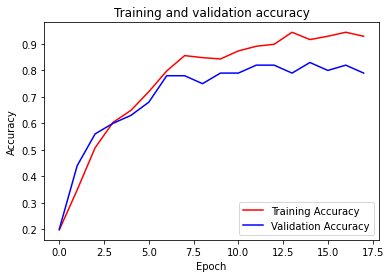

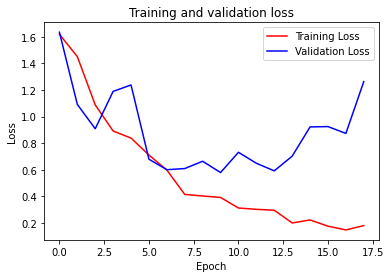

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Test Model

In [ ]:
def test_model(text):

  labels = ['Tari Pakarena', 'Tari Manganda', 'Tari Patudduq', 'Tari Pagellu', 'Tari Pajoge']

  test_pad = pad_sequences(
      tokenizer.texts_to_sequences(text),
      padding=padding_type,
      maxlen=maxlen
  )

  test_prediction = model.predict(test_pad)
  list_test = labels[np.argmax(test_prediction)]

  print(
      "[text] : {}\n[topic] : {}".format(text[0], list_test)
  )

In [ ]:
test_model(['Toraja'])

[text] : Toraja
[topic] : Tari Manganda


## Model Evaluation

<Figure size 432x288 with 0 Axes>

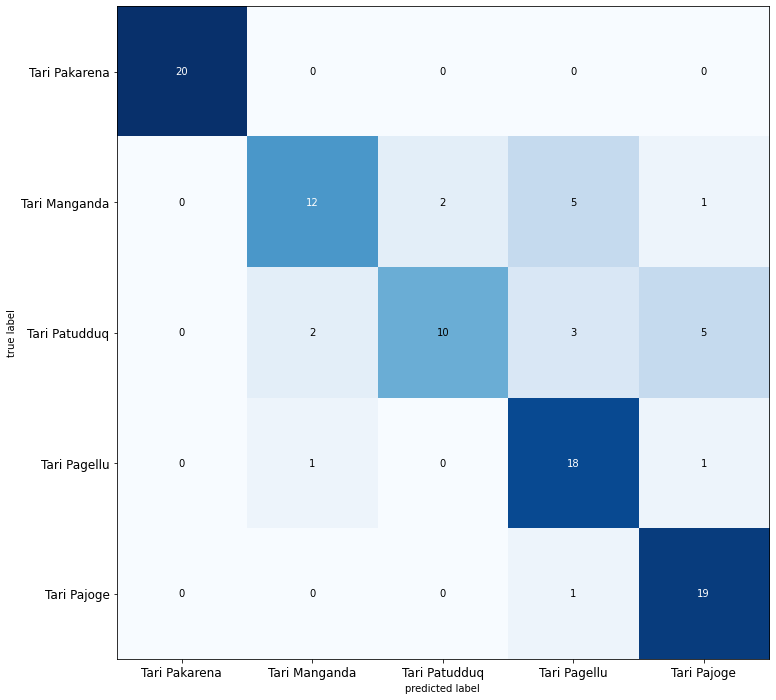

In [ ]:
# Using validation data
# Due to the submission requirement of 20% of all data used for validation and others for training
# Reference : http://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix/

labels = ['Tari Pakarena', 'Tari Manganda', 'Tari Patudduq', 'Tari Pagellu', 'Tari Pajoge']
preds = [np.argmax(i) for i in model.predict(x_val_pad)]

cm  = confusion_matrix(y_val.values, preds)
plt.figure()
plot_confusion_matrix(cm, figsize=(16,12), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(5), labels, fontsize=12)
plt.yticks(range(5), labels, fontsize=12)
plt.show()

### Recall, Precision and Accuracy

In [ ]:
# Using validation data
# Reference: https://scikit-learn.org/stable/modules/model_evaluation.html
print("Recall : {}".format(recall_score(y_val.values, preds, average='micro')))
print("Precision : {}".format(precision_score(y_val.values, preds, average='micro')))
print("Accuracy : {}".format(accuracy_score(y_val.values, preds)))

Recall : 0.79
Precision : 0.79
Accuracy : 0.79


## Download Model

In [ ]:
import os
from google.colab import files

In [ ]:
!pip install tensorflowjs

     |████████████████████████████████| 64 kB 2.1 MB/s  eta 0:00:01


In [ ]:
# Specifies the model directory
model_dir = '/tmp/model'
try:
  os.mkdir(model_dir)
except OSError as e:
  print("\nUnable create directory. {}".format(e))

In [ ]:
# Save model .h5
model_name = "model_nlp_ohdance_v01"
model.save(model_dir+f"/{model_name}.h5")

In [ ]:
# Download model .h5, for backup
files.download('/tmp/model/model_nlp_ohdance_v01.h5')

print('`model_nlp_ohdance_v01.h5` has been downloaded')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

`model_nlp_ohdance_v01.h5` has been downloaded


In [ ]:
!tensorflowjs_converter \
    --input_format=keras \
    --output_format=tfjs_layers_model \
    /tmp/model/model_nlp_ohdance_v01.h5 \
    /tmp/tfjs_float_model

In [ ]:
!tensorflowjs_converter \
    --quantize_uint8 \
    --input_format=keras \
    --output_format=tfjs_layers_model \
    /tmp/model/model_nlp_ohdance_v01.h5 \
    /tmp/tfjs_quant_model

In [ ]:
!zip -r /tmp/tfjs_float_model_v01.zip /tmp/tfjs_float_model

  adding: tmp/tfjs_float_model/ (stored 0%)
  adding: tmp/tfjs_float_model/group1-shard1of1.bin (deflated 8%)
  adding: tmp/tfjs_float_model/model.json (deflated 83%)


In [ ]:
# Download the model
files.download('/tmp/tfjs_float_model_v01.zip')

print('`tfjs_float_model_v01.zip` has been downloaded')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

`tfjs_float_model_v01.zip` has been downloaded


In [ ]:
!zip -r /tmp/tfjs_quant_model_v01.zip /tmp/tfjs_quant_model

  adding: tmp/tfjs_quant_model/ (stored 0%)
  adding: tmp/tfjs_quant_model/group1-shard1of1.bin (deflated 19%)
  adding: tmp/tfjs_quant_model/model.json (deflated 82%)


In [ ]:
# Download the model
files.download('/tmp/tfjs_quant_model_v01.zip')

print('`tfjs_quant_model_v01.zip` has been downloaded')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

`tfjs_quant_model_v01.zip` has been downloaded
